In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# Loading the crypto dataset
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col = 0)
print(crypto_df.shape) # equal to dtypes
crypto_df.head()

(1252, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [8]:
# filter the data set into only those being traded
# and drop the untrading rows (False)
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
print(crypto_df.shape) # equal to dtypes
crypto_df.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [10]:
crypto_df = crypto_df.drop('IsTrading',axis = 1) # axis = 1 is meant drop column, = 0 : row
print(crypto_df.shape)
crypto_df.head()

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
# drop whole rows (axix=0) any null values in data
crypto_df = crypto_df.dropna(axis=0,how='any')
print(crypto_df.shape)
crypto_df.head()

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [12]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
print(crypto_df.shape) # equal to dtypes
crypto_df.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [13]:
# index =... is to keep the same index format of df

drop_df = pd.DataFrame(crypto_df['CoinName'],index = crypto_df.index)
print(drop_df.shape) # equal to dtypes
drop_df.head()

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [14]:
crypto_df = crypto_df.drop('CoinName',axis = 1) # axis = 1 is meant drop column, = 0 : row
print(crypto_df.shape)
crypto_df.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [16]:
# convert the Algo and Proof columns into dummies

X = pd.get_dummies(data = crypto_df, columns = ['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Scale the data 
X_scale = StandardScaler().fit_transform(X)



In [20]:
# use the PCA model (n_components=0.90 (90%) per the requirement)
# pca is principle components 

pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(X_scale)
print(crypto_pca.shape)
crypto_pca

(532, 74)


array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.59739281e-16,  1.97575530e-15, -3.71605237e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         5.43061254e-16,  1.99779328e-15, -3.11626968e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.54476800e-16, -4.32593747e-14,  1.65758952e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -6.75451531e-15, -2.68400098e-14, -3.09519451e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -2.98168844e-15,  1.40929630e-15,  2.00083429e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -2.01376397e-16, -1.84880272e-16,  9.16676431e-16]])

In [22]:
# reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(X_scale)

In [23]:
tsne_features.shape

(532, 2)

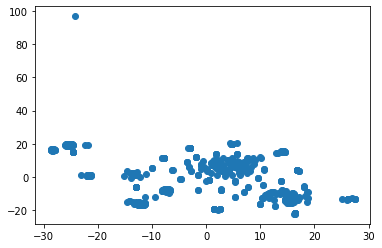

In [24]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [28]:
# for-loop to determine the inertia for each `k` between 1 through 10. 
# Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,43052.480512
5,6,41791.798474
6,7,41503.005820
7,8,40089.757320
8,9,39713.090167
9,10,38955.589410


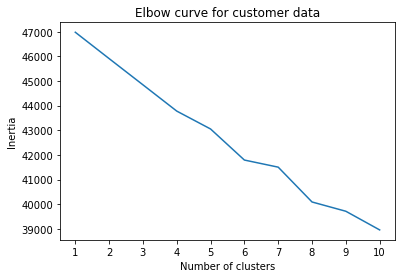

In [29]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [ ]:
# def get_clusters(k, data):
#     # Initialize the K-Means model
#     model = KMeans(n_clusters=k, random_state=0)

#     # Train the model
#     model.fit(data)

#     # Predict clusters
#     predictions = model.predict(data)

#     # Create return DataFrame with predicted clusters
#     data["class"] = model.labels_

#     return data